# PIK3CA: Effects of Mutation on CDK5

<b> CDK5 is the catylyctic kinase involved in phosphorylating IRS2, which activates PIK3CA, at a specific site showing significant results (http://regphos.mbc.nctu.edu.tw/show_prediction.php?substrate_ID=IRS2_HUMAN&pos=391) </b>

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

<b> Import CPTAC data

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and CDK5 proteome abundance

### Take out the control (101 - 140)

In [10]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [5]:
protList = ['CDK5']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'


sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for CDK5: 
Ttest_indResult(statistic=2.0684520334765586, pvalue=0.041230997730369444)


 ### We can now plot the data 

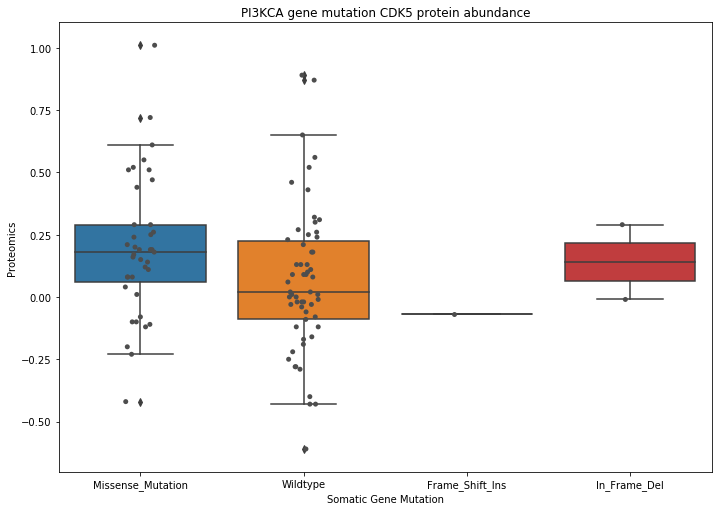

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='CDK5', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation CDK5 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='CDK5',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PIK3CA mutation and CDK5 phosphoproteome abundance 

In [7]:
phosProtList = ['CDK5']

In [9]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0

for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites
print(pcutoff)
#pcutoff = 1
    
    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    significantPhosResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)    

0.025
Test for CDK5RAP2-S1061: 
Ttest_indResult(statistic=2.497283344433462, pvalue=0.014273204866034546)
Gene Patient_Type not found in phosphoproteomics data


AttributeError: 'NoneType' object has no attribute 'columns'